# IS 362- Final Project
#### {Presented by: Sanam Maharjan & Praveen Lama}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2018.csv', 
                   dtype={'Summon Number': np.int64, 
                          'Plate ID': object, 
                         'Registration State': object, 
                         'Plate Type': object, 
                         'Issue Date': object, 
                         'Violation Code': np.int64, 
                         'Vehicle Body Type': object, 
                         'Vehicle Make': object, 
                         'Issuing Agency': object, 
                         'Street Code1': np.int64, 
                         'Street Code2': np.int64, 
                         'Street Code3': np.int64, 
                         'Vehicle Expiration Date': np.int64, 
                         'Violation Loation': np.float64, 
                         'Violation Precinct': np.int64, 
                         'Issuer Precinct': np.int64,
                         'Issuer Code': np.int64, 
                         'Issuer Command': object, 
                         'Issuer Squad': object, 
                         'Violation Time': object, 
                         'Time First Observed': object, 
                         'Violaion County': object, 
                         'Violation In Front Of Or Opposite': object, 
                         'House Number': object, 
                         'Street Name': object, 
                         'Intersecting Street': object, 
                         'Date First Observed': np.int64, 
                         'Law Section': np.int64, 
                         'Sub Division': object, 
                         'Violation Legal Code': object,
                         'Days Parking In Effect': object, 
                         'From Hours In Effect': object, 
                         'To Hours In Effect': object, 
                         'Vehicle Color': object, 
                         'Unregistered Vehicle?': np.float64, 
                         'Vehicle Year': np.int64, 
                         'Meter Number': object, 
                         'Feet From Curb': np.int64,
                         'Violation Post Code': object, 
                         'Violation Description': object, 
                         'No Standig or Stopping Violation': np.float64, 
                         'Hydrant Violation': np.float64, 
                         'Double Parking Violation': np.float64}, low_memory=False)

In [3]:
data.dtypes

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

> ### Converting 'Issue date' to datetime datatype

In [4]:
data['Issue Date'] = pd.to_datetime(data['Issue Date'], errors='coerce')

In [5]:
data.dtypes.head(5)

Summons Number                 int64
Plate ID                      object
Registration State            object
Plate Type                    object
Issue Date            datetime64[ns]
dtype: object

> ### Checking Null Values

In [6]:
data.isnull().sum()

Summons Number                             0
Plate ID                                  90
Registration State                         0
Plate Type                                 0
Issue Date                               304
Violation Code                             0
Vehicle Body Type                      11940
Vehicle Make                           26068
Issuing Agency                             1
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                    585123
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                        580072
Issuer Squad                          580076
Violation Time                            33
Time First Observed                  3659458
Violation County                       13564
Violation 

In [7]:
clear_data = data.fillna(0) # Filling null values
clear_data.isnull().sum() # Checking if any null remains

Summons Number                       0
Plate ID                             0
Registration State                   0
Plate Type                           0
Issue Date                           0
Violation Code                       0
Vehicle Body Type                    0
Vehicle Make                         0
Issuing Agency                       0
Street Code1                         0
Street Code2                         0
Street Code3                         0
Vehicle Expiration Date              0
Violation Location                   0
Violation Precinct                   0
Issuer Precinct                      0
Issuer Code                          0
Issuer Command                       0
Issuer Squad                         0
Violation Time                       0
Time First Observed                  0
Violation County                     0
Violation In Front Of Or Opposite    0
House Number                         0
Street Name                          0
Intersecting Street      

In [8]:
clear_data.head(10) # reading data

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1398749692,HXL0464,PA,PAS,2017-06-24,14,VAN,JEEP,P,38430,...,GY,0.0,0,-,0,0,0,0.0,0.0,0.0
1,1398751765,HSL6756,NY,PAS,2017-07-11,16,SDN,NISSA,P,13610,...,GRAY,0.0,2017,-,0,0,0,0.0,0.0,0.0
2,1398759193,GWY8601,NY,PAS,2017-07-10,51,SUBN,BMW,P,0,...,BLACK,0.0,2005,-,0,0,0,0.0,0.0,0.0
3,1399031417,K518GN,NY,999,2017-07-14,21,SDN,NISSA,S,26790,...,BLUE,0.0,0,-,0,0,0,0.0,0.0,0.0
4,1399031466,HDG7313,NY,PAS,2017-07-03,21,SDN,VOLKS,S,21790,...,GRAY,0.0,2008,-,0,0,0,0.0,0.0,0.0
5,1399108890,GPS3390,NY,PAS,2017-06-30,17,SUBN,ME/BE,S,18730,...,BLACK,0.0,2014,-,0,0,0,0.0,0.0,0.0
6,1399203782,HSE9348,NY,999,2017-06-22,21,SDN,HYUN,S,63290,...,BLUE,0.0,2017,-,0,0,0,0.0,0.0,0.0
7,1399203794,GAV7154,NY,PAS,2017-06-22,21,SUBN,CHRYS,S,63290,...,WHITE,0.0,2012,-,0,0,0,0.0,0.0,0.0
8,1399203800,GYQ6468,OH,PAS,2017-06-22,21,0,BMW,S,63290,...,SILVE,0.0,0,-,0,0,0,0.0,0.0,0.0
9,1399203812,HCZ2924,NY,PAS,2017-06-22,21,SDN,DODGE,S,63290,...,WHITE,0.0,2006,-,0,0,0,0.0,0.0,0.0


In [9]:
clear_data.shape  # Total rows and columns

(3885393, 43)

> ### Total Number for Violation by County

Violation County
NY    1319147
K      824544
Q      689391
BX     491765
BK     241650
QN     194641
R       47676
ST      35082
MN      27933
0       13564
Name: Violation Code, dtype: int64

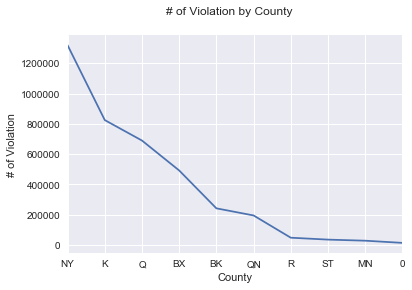

In [80]:
v_count = clear_data.groupby('Violation County')['Violation Code'].count().sort_values(ascending=False)
v_count.plot()
plt.suptitle('# of Violation by County')
plt.xlabel('County')
plt.ylabel('# of Violation')

v_count

> ### Sorting Violation only for County = Q

In [12]:
# Queens = clear_data['Violation County']== 'Q'
q_county = clear_data[['Violation County', 'Violation Code']] # Selecting only two columns
q_only = q_county[q_county['Violation County'] == 'Q']
q_only.sort_values(by='Violation Code').head(10).sort_values(by='Violation Code', ascending=False)

,Violation County,Violation Code
3240396,Q,6
383800,Q,5
2832841,Q,5
14437,Q,4
2294587,Q,2
816731,Q,2
941371,Q,2
797303,Q,0
1363488,Q,0
1262903,Q,0


> ### Importing another CSV with Violation fine and codes

In [13]:
column = ['Violation Code','Definition', 'Manhattan 96th St. & below', 'All Other Areas'] # setting column names
v_code = pd.read_csv('DOF_Parking_Violation_Codes.csv', names=column, header=None ) # imporint CSV
code = v_code.iloc[1:] # selecting column from 2nd row 
code.shape

(84, 4)

In [14]:
code

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
1,10,"Stopping, standing or parking where a sign, st...",$115,$115
2,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
3,12,Snow Emergency: Standing or parking where stan...,$95,$95
4,13,Taxi Stand: Standing or parking where standing...,$115,$115
5,14,General No Standing: Standing or parking where...,$115,$115
6,16,Truck Loading/Unloading: Standing or parking w...,$95,$95
7,17,Authorized Vehicles Only: Standing or parking ...,$95,$95
8,18,Bus Lane: Standing or parking where standing i...,$115,$115
9,19,Bus Stop: Standing or parking where standing i...,$115,$115
10,20,General No Parking: No parking where parking i...,$65,$60


In [15]:
code.dtypes

Violation Code                object
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

> Since, all 4 columns are object, we need to change column 'Violation Code', 'Manhattan 96th St. & below' & 'All Other Areas' to numeric datatype. In order to do that we need to clean few rows first since, it contains strings as well. We can check row 81, 74, 24 etc.

In [16]:
row = code.loc[code['Violation Code']=='37-38']
code = code.append([row]*1, ignore_index=True) # copying row and apppend
code.shape

(85, 4)

In [17]:
code.loc[code['Violation Code']=='37-38'] # printing just to confirm

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
23,37-38,Muni Meter --\n(37) Parking in excess of the a...,$65,$35
84,37-38,Muni Meter --\n(37) Parking in excess of the a...,$65,$35


In [18]:
code.loc[[23],'Violation Code'] = '37' # changing values '37-38' to 37
code.loc[[84],'Violation Code'] = '38' # changing values '37-38' to 38

In [19]:
code.loc[[23, 84]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
23,37,Muni Meter --\n(37) Parking in excess of the a...,$65,$35
84,38,Muni Meter --\n(37) Parking in excess of the a...,$65,$35


In [20]:
# converting datatype of 'Violation Code' column to numeric
code['Violation Code'] = pd.to_numeric(code['Violation Code'], errors='coerce') 

In [21]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

In [22]:
code.loc[[73, 80]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
73,94,Vehicle Release Agreement code associated with...,"100\n(Regular Tow, plus violation fine)","$200 (Heavy Tow, plus violation fine)"
80,6,Parking a tractor-trailer on a residential str...,1st Offense - $265\n2nd Offense - $515,2nd Offense - $265\n2nd Offense - $515


In [23]:
# Change values in row 73, 80
code.loc[[73], 'Manhattan 96th St. & below'] = '100'
code.loc[[73], 'All Other Areas'] = '200'
code.loc[[80], 'Manhattan 96th St. & below'] = '265'
code.loc[[80], 'All Other Areas'] = '265'

In [24]:
code.loc[[73, 80]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
73,94,Vehicle Release Agreement code associated with...,100,200
80,6,Parking a tractor-trailer on a residential str...,265,265


In [25]:
code.head(10)

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
2,12,Snow Emergency: Standing or parking where stan...,$95,$95
3,13,Taxi Stand: Standing or parking where standing...,$115,$115
4,14,General No Standing: Standing or parking where...,$115,$115
5,16,Truck Loading/Unloading: Standing or parking w...,$95,$95
6,17,Authorized Vehicles Only: Standing or parking ...,$95,$95
7,18,Bus Lane: Standing or parking where standing i...,$115,$115
8,19,Bus Stop: Standing or parking where standing i...,$115,$115
9,20,General No Parking: No parking where parking i...,$65,$60


In [26]:
# since colun, 'Manhattan 96th St. & below' & 'All other Areas' has $ sign, we need to remove $
code = code[code.columns[:]].replace('[\$,]', '', regex=True)

In [27]:
code.fillna(0) # Changing null values to 0

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,10,Stopping standing or parking where a sign stre...,115,115
1,11,Hotel Loading/Unloading: Standing or parking w...,115,115
2,12,Snow Emergency: Standing or parking where stan...,95,95
3,13,Taxi Stand: Standing or parking where standing...,115,115
4,14,General No Standing: Standing or parking where...,115,115
5,16,Truck Loading/Unloading: Standing or parking w...,95,95
6,17,Authorized Vehicles Only: Standing or parking ...,95,95
7,18,Bus Lane: Standing or parking where standing i...,115,115
8,19,Bus Stop: Standing or parking where standing i...,115,115
9,20,General No Parking: No parking where parking i...,65,60


In [28]:
code.loc[[77], 'Manhattan 96th St. & below'] = '60'
code.loc[[77], 'All Other Areas'] = '60'
code.loc[[81], 'Manhattan 96th St. & below'] = '50'
code.loc[[81], 'All Other Areas'] = '50'
code.loc[[82], 'Manhattan 96th St. & below'] = '115'
code.loc[[82], 'All Other Areas'] = '115'

In [29]:
code.loc[[77, 81, 82]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
77,99,All other parking standing or stopping violati...,60,60
81,7,Vehicles photographed going through a red ligh...,50,50
82,8,Vehicle idling in a restricted area.,115,115


In [30]:
code.isnull().sum()

Violation Code                0
Definition                    0
Manhattan 96th St. & below    0
All Other Areas               1
dtype: int64

In [31]:
code.loc[[78], 'All Other Areas'] = '115'

In [32]:
code.isnull().sum()

Violation Code                0
Definition                    0
Manhattan 96th St. & below    0
All Other Areas               0
dtype: int64

In [33]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

In [34]:
code['Manhattan 96th St. & below'] = pd.to_numeric(code['Manhattan 96th St. & below'], errors='coerce')
code['All Other Areas'] = pd.to_numeric(code['All Other Areas'], errors='coerce')

In [35]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below     int64
All Other Areas                int64
dtype: object

In [36]:
code.head()

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,10,Stopping standing or parking where a sign stre...,115,115
1,11,Hotel Loading/Unloading: Standing or parking w...,115,115
2,12,Snow Emergency: Standing or parking where stan...,95,95
3,13,Taxi Stand: Standing or parking where standing...,115,115
4,14,General No Standing: Standing or parking where...,115,115


 > ### Merging two data based on 'Violation Code'

In [37]:
merge = pd.merge(q_only, code, on='Violation Code')
merge.head(5)

,Violation County,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,Q,51,Stopping standing or parking on a sidewalk.,115,115
1,Q,51,Stopping standing or parking on a sidewalk.,115,115
2,Q,51,Stopping standing or parking on a sidewalk.,115,115
3,Q,51,Stopping standing or parking on a sidewalk.,115,115
4,Q,51,Stopping standing or parking on a sidewalk.,115,115


In [38]:
merge.shape

(689039, 5)

> ### Revenue generated by violation only in 'Q' County

In [39]:
merge[['Violation Code', 'All Other Areas']].agg({'All Other Areas': np.sum})

All Other Areas    45847705
dtype: int64

> ### Merging Violation Fine with Clear data(All Data)

In [40]:
new_merge = pd.merge(clear_data, code, on='Violation Code')
new_merge.head(3)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Definition,Manhattan 96th St. & below,All Other Areas
0,1398749692,HXL0464,PA,PAS,2017-06-24,14,VAN,JEEP,P,38430,...,-,0,0,0,0.0,0.0,0.0,General No Standing: Standing or parking where...,115,115
1,1399337695,R54GGU,NJ,PAS,2017-07-04,14,SUBN,DODGE,P,29370,...,-,0,0,0,0.0,0.0,0.0,General No Standing: Standing or parking where...,115,115
2,1399337749,SAYNAZ6,NY,OMT,2017-07-04,14,SUBN,TOYOT,P,29370,...,-,0,0,0,0.0,0.0,0.0,General No Standing: Standing or parking where...,115,115


In [41]:
Selected_data = new_merge[['Violation Code', 
                          'Issuing Agency', 
                          'Issue Date',
                           'Violation County', 
                          'All Other Areas']]
Selected_data['# of Violation'] = Selected_data['All Other Areas']
Selected_data['Revenue'] = Selected_data['All Other Areas']

Selected_data.head()
top100_selected = Selected_data.head(100).sort_values(by='# of Violation', ascending=False)

C:\Users\smaharjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\smaharjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [42]:
Selected_data.head()

,Violation Code,Issuing Agency,Issue Date,Violation County,All Other Areas,# of Violation,Revenue
0,14,P,2017-06-24,K,115,115,115
1,14,P,2017-07-04,NY,115,115,115
2,14,P,2017-07-04,NY,115,115,115
3,14,P,2017-07-04,NY,115,115,115
4,14,P,2017-07-04,NY,115,115,115


 > ### Top Violation Code grouped by County and Total Number

# of Violation
Violation Code Violation County                
21             K                         244697
14             NY                        191790
20             NY                        149276
21             Q                         132306
46             NY                        117424
38             K                         114120
21             NY                        112468
38             Q                         109585
               NY                        104344
21             BX                         86291

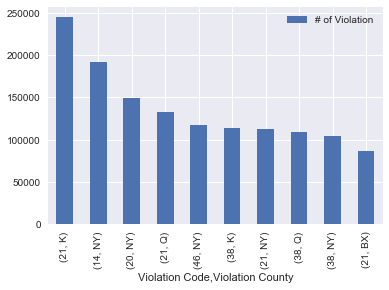

In [43]:
violation_group = Selected_data.groupby(['Violation Code', 'Violation County']).count().sort_values(by='# of Violation', ascending=False)
top10 = violation_group[['# of Violation']].head(10)
top10.plot.bar()
top10

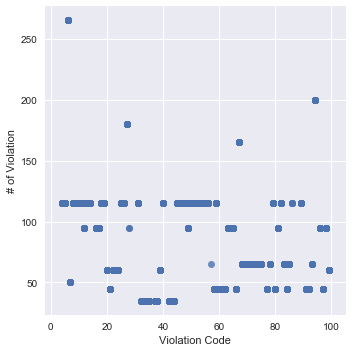

In [44]:
sns.lmplot('Violation Code', '# of Violation', data= Selected_data, fit_reg=False)

> ### Revenue Generated in County by Violation Code

,,Revenue
Violation Code,Violation County,
14,NY,22055850
46,NY,13503760
21,K,11011365
20,NY,8956560
14,K,7364140
40,K,7024200
14,Q,6188035
31,NY,5990695
21,Q,5953770


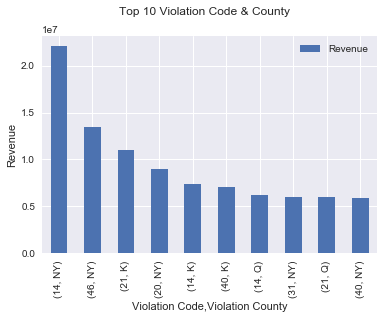

In [78]:
a_data = Selected_data.groupby(['Violation Code', 'Violation County']). agg({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar()
plt.suptitle('Top 10 Violation Code & County')
plt.ylabel('Revenue')
top10_data

> ### Top 10 Violation Code and Revenue generated

,Revenue
Violation Code,
14,38909445
21,25976340
46,24903250
40,22156475
20,19061040
38,13491625
71,12967760
19,12139285
7,10110400


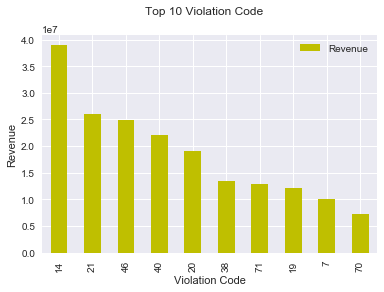

In [76]:
a_data = Selected_data.groupby(['Violation Code']). agg({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar(color='y')
plt.suptitle('Top 10 Violation Code')
plt.xlabel('Violation Code')
plt.ylabel('Revenue')
top10_data

> ### Total generate Revenue by County

,Revenue
Violation County,
NY,107626375
K,55401140
Q,45847705
BX,31620215
BK,5836490
QN,4650055
R,3409280
MN,1692315
0,1124645


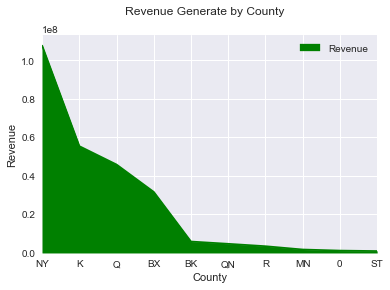

In [91]:
Revenue = Selected_data.groupby(['Violation County']).agg({'Revenue': np.sum})
Revenue_sorted = Revenue.sort_values(by='Revenue', ascending=False)
Revenue_sorted.plot.area(color='g')
plt.suptitle('Revenue Generate by County')
plt.xlabel('County')
plt.ylabel('Revenue')
Revenue_sorted

Violation County
NY    107626375
K      55401140
Q      45847705
BX     31620215
BK      5836490
QN      4650055
R       3409280
MN      1692315
0       1124645
ST       882660
Name: Revenue, dtype: int64

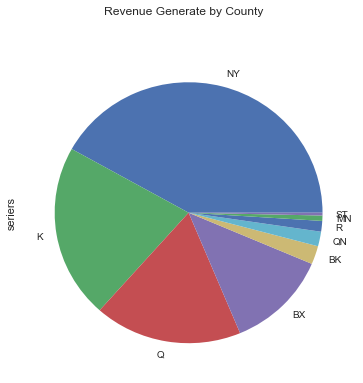

In [69]:
Rev = Revenue['Revenue'].sort_values(ascending=False)
County = ['NY', 'K', 'Q', 'BX', 'BK', 'QN', 'R', 'MN', '0', 'ST']
series = pd.Series(Rev, index=County, name='seriers')
series.plot.pie(figsize=(6,6))
plt.suptitle('Revenue Generate by County')
Rev

> ### Analyzing total number for violation, and revenue sum by County

,count,sum,mean
Violation County,,,
NY,1317347,107626375,81.699336
K,823925,55401140,67.240513
Q,689039,45847705,66.538621
BX,444042,31620215,71.209964
BK,89110,5836490,65.497587
QN,87051,4650055,53.417594
R,47637,3409280,71.567899
MN,21144,1692315,80.037599
0,13287,1124645,84.642508


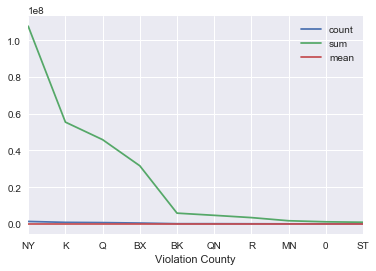

In [174]:
Analysis = new_merge[['Violation County', 'Violation Code', 'All Other Areas']]
chart = Analysis.groupby('Violation County')['All Other Areas'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)
chart.plot.line()
chart

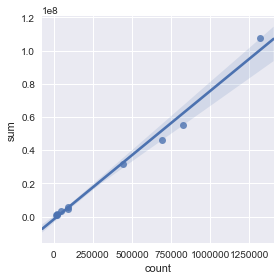

In [161]:
sns.lmplot(x='count', y='sum',data=chart, size=4)